# 神经网络

## 定义numpy版本的神经网络

In [39]:
#!pip install scipy

### 定义

In [79]:
import numpy
import scipy.special

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate, epochs):
        # 输入层
        self.input_nodes = input_nodes
        # 隐藏层
        self.hidden_nodes = hidden_nodes
        # 输出层
        self.output_nodes = output_nodes        
        
        # 激活函数
        self.activation_function = lambda x: scipy.special.expit(x)

		# 学习率
        self.learning_rate = learning_rate
        
        # 训练批次
        self.epochs = epochs

		# 要训练的权重矩阵：输入-隐层
        self.w_input_hidden = numpy.random.normal(
            0.0,
            pow(self.hidden_nodes, -0.5),
            (self.hidden_nodes, self.input_nodes)
        )

		# 要训练的权重矩阵：隐层-输出
        self.w_hidden_output = numpy.random.normal(
            0.0,
            pow(self.output_nodes, -0.5),
            (self.output_nodes, self.hidden_nodes)
        )
    
    def train(self, inputs_list, targets_list):
        """
        按批次训练
         """
        for e in range(self.epochs):
            self._step_train(inputs_list, targets_list)

    def _step_train(self, inputs_list, targets_list):
        """
        单个批次训练
        """
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.w_input_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.w_hidden_output, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.w_hidden_output.T, output_errors)
        
        self.w_hidden_output += self.learning_rate * numpy.dot(
            output_errors * final_outputs * (1.0 - final_outputs),
            numpy.transpose(hidden_outputs)
        )
        self.w_input_hidden += self.learning_rate * numpy.dot(
            hidden_errors * hidden_outputs * (1.0 - hidden_outputs),
            numpy.transpose(inputs)
        )

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.w_input_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.w_hidden_output, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

### 加载数据集

In [80]:
data_file = open("../data/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [81]:
#!pip install matplotlib

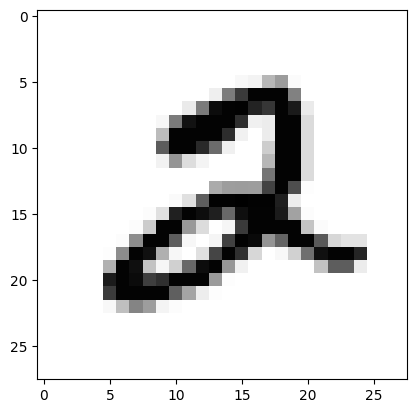

In [82]:
import numpy
import matplotlib.pyplot
%matplotlib inline

all_values = data_list[5].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

### 训练（使用 MINI 数据）

In [93]:
n = NeuralNetwork(input_nodes=784, hidden_nodes=200, output_nodes=10, learning_rate=0.2, epochs=2)

training_data_file = open("../data/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    all_values = record.split(',')

	# 输入
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

	# 目标值
    targets = numpy.zeros(10) + 0.01
    targets[int(all_values[0])] = 0.99

    n.train(inputs, targets)

### 测试（使用 MINI 数据）

In [94]:

test_data_file = open("../data/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [95]:
score_card = []

for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    print("-"*20)
    print(correct_label, "correct_lable")
    
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(label, "predict answer")
    
    if label == correct_label:
        score_card.append(1)
    else:
        score_card.append(0)

print(score_card)

--------------------
7 correct_lable
7 predict answer
--------------------
2 correct_lable
2 predict answer
--------------------
1 correct_lable
1 predict answer
--------------------
0 correct_lable
0 predict answer
--------------------
4 correct_lable
4 predict answer
--------------------
1 correct_lable
1 predict answer
--------------------
4 correct_lable
7 predict answer
--------------------
9 correct_lable
3 predict answer
--------------------
5 correct_lable
4 predict answer
--------------------
9 correct_lable
7 predict answer
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


### 训练（使用完整数据）

In [102]:
n = NeuralNetwork(input_nodes=784, hidden_nodes=200, output_nodes=10, learning_rate=0.1, epochs=5)

training_data_file = open("../data/large_data/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    all_values = record.split(',')

	# 输入
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

	# 目标值
    targets = numpy.zeros(10) + 0.01
    targets[int(all_values[0])] = 0.99
    
    n.train(inputs, targets)

### 测试（使用完整数据）

In [98]:

test_data_file = open("../data/large_data/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [101]:
score_card = []

for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    # print("-"*20)
    # print(correct_label, "correct_lable")
    
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    # print(label, "predict answer")
    
    if label == correct_label:
        score_card.append(1)
    else:
        score_card.append(0)

print(score_card[:20])
score_card_array = numpy.asarray(score_card)
print("performance = ", score_card_array.sum() / score_card_array.size)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
performance =  0.9465


## 定义pytorch版本的神经网络

In [3]:
# !pip install torch

In [4]:
# !pip install torchvision

### 定义

In [5]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

BATCH_SIZE = 64
TEST_BACTH_SIZE = 1000
EPOCHS = 5
LR = 0.01
SEED = 42
LOG_INTERVAL = 100

# 定义一个全连接网络
class FeedForwardNet(nn.Module):
    def __init__(self):
        super().__init__()
        # 第一层784维输入、256维输出 -- 图像大小28×28=784
        self.fc1 = nn.Linear(784, 256)
        # 第二层256维输入、128维输出
        self.fc2 = nn.Linear(256, 128)
        # 第三层128维输入、64维输出
        self.fc3 = nn.Linear(128, 64)
        # 第四层64维输入、10维输出 -- 输出类别10类（0,1,...9）
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # 把输入展平成1D向量
        x = x.view(x.shape[0], -1)

        # 每层激活函数是ReLU，额外加dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # 输出为10维概率分布
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

### 训练

In [6]:

# 训练过程
def train(model, loss_fn, device, train_loader, optimizer, epoch):
    # 开启梯度计算
    model.train()
    for batch_idx, (data_input, true_label) in enumerate(train_loader):
        # 从数据加载器读取一个batch
        # 把数据上载到GPU（如有）
        data_input, true_label = data_input.to(device), true_label.to(device)
        # 求解器初始化（每个batch初始化一次）
        optimizer.zero_grad()
        # 正向传播：模型由输入预测输出
        output = model(data_input)
        # 计算loss
        loss = loss_fn(output, true_label)
        # 反向传播：计算当前batch的loss的梯度
        loss.backward()
        # 由求解器根据梯度更新模型参数
        optimizer.step()

        # 间隔性的输出当前batch的训练loss
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data_input), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

### 测试

In [7]:

# 计算在测试集的准确率和loss
def test(model, loss_fn, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # sum up batch loss
            test_loss += loss_fn(output, target, reduction='sum').item()
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


def main():
    # 检查是否有GPU
    use_cuda = torch.cuda.is_available()

    # 设置随机种子（以保证结果可复现）
    torch.manual_seed(SEED)

    # 训练设备（GPU或CPU）
    device = torch.device("cuda" if use_cuda else "cpu")

    # 设置batch size
    train_kwargs = {'batch_size': BATCH_SIZE}
    test_kwargs = {'batch_size': TEST_BACTH_SIZE}

    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    # 数据预处理（转tensor、数值归一化）
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # 自动下载MNIST数据集
    dataset_train = datasets.MNIST('data', train=True, download=True,
                                   transform=transform)
    dataset_test = datasets.MNIST('data', train=False,
                                  transform=transform)

    # 定义数据加载器（自动对数据加载、多线程、随机化、划分batch、等等）
    train_loader = torch.utils.data.DataLoader(dataset_train, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset_test, **test_kwargs)

    # 创建神经网络模型
    model = FeedForwardNet().to(device)

    # 指定求解器
    optimizer = optim.SGD(model.parameters(), lr=LR)
    # scheduler = StepLR(optimizer, step_size=1, gamma=0.9)

    # 定义loss函数
    # 注：nll 作用于 log_softmax 等价于交叉熵，感兴趣的同学可以自行推导
    # https://blog.csdn.net/weixin_38145317/article/details/103288032
    loss_fn = F.nll_loss

    # 训练N个epoch
    for epoch in range(1, EPOCHS + 1):
        train(model, loss_fn, device, train_loader, optimizer, epoch)
        test(model, loss_fn, device, test_loader)
        # scheduler.step()
        
main()

100%|██████████| 9912422/9912422 [00:02<00:00, 4914805.53it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 343804.39it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 997949.29it/s] 


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7520935.16it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.287443
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.284967
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.273498
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.022655
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.680804
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.322924
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.978829
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.955913
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.670626
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.821396

Test set: Average loss: 0.5133, Accuracy: 8524/10000 (85%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.740045
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.698195
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.676256
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.531444
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.457620
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.622829
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.354776
Train Epoch: 2 [44800/60000 (7